# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
# 80% for training.
X_train = dataset[:4000, 1:].reshape(4000,1,28, 28).astype( 'float32' )
y_train = dataset[:4000,0]
# 20% for test.
X_test = dataset[4000:, 1:].reshape(1000,1,28, 28).astype( 'float32' )
y_test = dataset[4000:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [8]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [9]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [10]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [11]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [12]:
# Use the model by parameters.
def use_model(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [13]:
# GD.
use_model([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 186us/step - loss: 2.3083 - acc: 0.0950 - val_loss: 2.3009 - val_acc: 0.1040
89.6
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 148us/step - loss: 2.3092 - acc: 0.1050 - val_loss: 2.2990 - val_acc: 0.1210
87.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 128us/step - loss: 2.3104 - acc: 0.0948 - val_loss: 2.6227 - val_acc: 0.0820
91.8


In [14]:
# SGD.
use_model([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 35s 9ms/step - loss: 2.7279 - acc: 0.1187 - val_loss: 2.9220 - val_acc: 0.0920
90.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 35s 9ms/step - loss: 2.9589 - acc: 0.1028 - val_loss: 3.1954 - val_acc: 0.1290
87.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 31s 8ms/step - loss: 14.4625 - acc: 0.1025 - val_loss: 14.4902 - val_acc: 0.1010
89.9


In [15]:
# MB10.
use_model([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 4s 1ms/step - loss: 1.8032 - acc: 0.3255 - val_loss: 0.8689 - val_acc: 0.7140
28.60000000000001
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 7s 2ms/step - loss: 2.5510 - acc: 0.1095 - val_loss: 2.7819 - val_acc: 0.0840
91.6
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 4s 1ms/step - loss: 7.4578 - acc: 0.1065 - val_loss: 7.3686 - val_acc: 0.1120
88.8


In [16]:
# MB50.
use_model([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 345us/step - loss: 2.2678 - acc: 0.1560 - val_loss: 2.1484 - val_acc: 0.2160
78.4
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 425us/step - loss: 2.2105 - acc: 0.1737 - val_loss: 1.8406 - val_acc: 0.2830
71.7
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 399us/step - loss: 2.5421 - acc: 0.0995 - val_loss: 2.4711 - val_acc: 0.0920
90.8


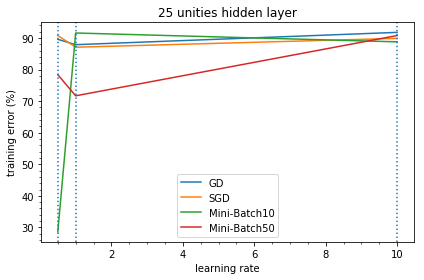

In [25]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('25-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [26]:
# GD.
use_model([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 323us/step - loss: 2.3163 - acc: 0.0925 - val_loss: 2.3005 - val_acc: 0.1500
85.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 217us/step - loss: 2.3145 - acc: 0.0978 - val_loss: 2.3141 - val_acc: 0.1100
89.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 338us/step - loss: 2.3158 - acc: 0.1028 - val_loss: 3.4853 - val_acc: 0.1210
87.9


In [27]:
# SGD.
use_model([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 41s 10ms/step - loss: 14.4738 - acc: 0.1017 - val_loss: 14.6352 - val_acc: 0.0920
90.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 42s 10ms/step - loss: 14.4623 - acc: 0.1025 - val_loss: 14.4902 - val_acc: 0.1010
89.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 41s 10ms/step - loss: 14.5713 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
89.5


In [28]:
# MB10.
use_model([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 2ms/step - loss: 1.7786 - acc: 0.3343 - val_loss: 0.9732 - val_acc: 0.6190
38.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 1ms/step - loss: 2.3073 - acc: 0.1213 - val_loss: 1.9644 - val_acc: 0.2700
73.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 2ms/step - loss: 14.5655 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
91.6


In [29]:
# MB50.
use_model([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 581us/step - loss: 2.2645 - acc: 0.1550 - val_loss: 2.0578 - val_acc: 0.2890
71.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 549us/step - loss: 2.2656 - acc: 0.1563 - val_loss: 1.9289 - val_acc: 0.3350
66.5
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 3s 704us/step - loss: 14.2446 - acc: 0.1005 - val_loss: 14.6352 - val_acc: 0.0920
90.8


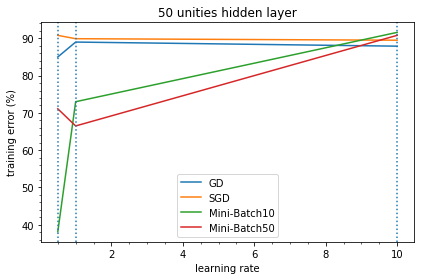

In [36]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('50-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [31]:
# GD.
use_model([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 476us/step - loss: 2.3688 - acc: 0.0978 - val_loss: 2.3201 - val_acc: 0.1210
87.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 297us/step - loss: 2.3261 - acc: 0.0808 - val_loss: 2.4214 - val_acc: 0.1120
88.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 282us/step - loss: 2.3102 - acc: 0.0918 - val_loss: 7.3840 - val_acc: 0.1210
87.9


In [32]:
# SGD.
use_model([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 40s 10ms/step - loss: 14.4745 - acc: 0.1017 - val_loss: 14.6352 - val_acc: 0.0920
90.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 38s 9ms/step - loss: 14.5431 - acc: 0.0975 - val_loss: 14.0389 - val_acc: 0.1290
87.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 38s 9ms/step - loss: 14.4625 - acc: 0.1025 - val_loss: 14.4902 - val_acc: 0.1010
89.9


In [33]:
# MB10.
use_model([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7880 - acc: 0.3383 - val_loss: 0.8196 - val_acc: 0.7150
28.5
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 2.1220 - acc: 0.2065 - val_loss: 1.3968 - val_acc: 0.4660
53.4
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5727 - acc: 0.0940 - val_loss: 14.7642 - val_acc: 0.0840
91.6


In [34]:
# MB50.
use_model([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 499us/step - loss: 2.2226 - acc: 0.1810 - val_loss: 1.9722 - val_acc: 0.3030
69.7
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 500us/step - loss: 2.3205 - acc: 0.1215 - val_loss: 2.1781 - val_acc: 0.1220
87.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 518us/step - loss: 14.1259 - acc: 0.1092 - val_loss: 14.1678 - val_acc: 0.1210
87.9


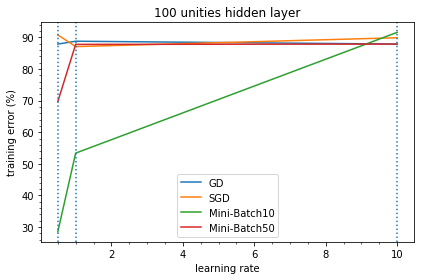

In [37]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('100-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

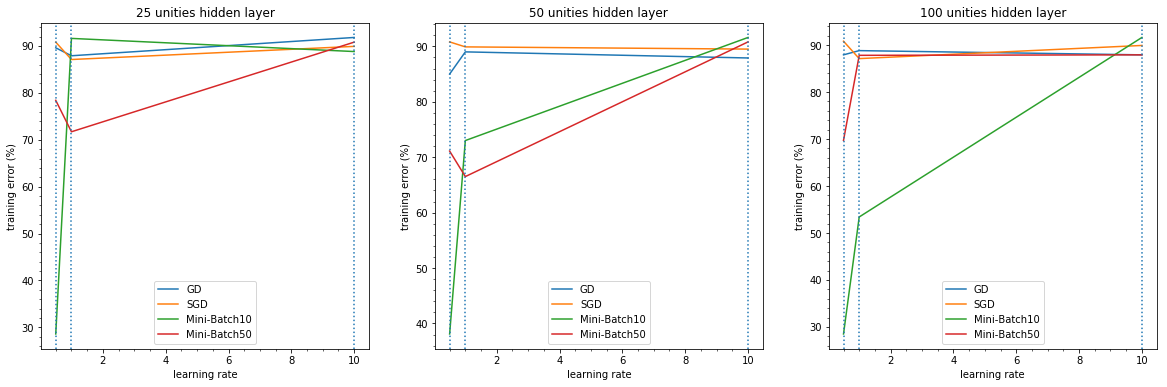

In [45]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')
f.savefig('comparison-hidden-layer.png', bbox_inches='tight', dpi = 100)

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o meno4 valor testado e 10 o maior valor testado). 
//Checar essa afirmação após os testes
A junção dos resultados é mostrada nos três gráficos gerados logo acima. Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

In [38]:
# GD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'gd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 487us/step - loss: 2.3122 - acc: 0.1015 - val_loss: 2.3021 - val_acc: 0.1210
87.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 359us/step - loss: 2.3122 - acc: 0.1125 - val_loss: 2.2976 - val_acc: 0.1210
87.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 1s 374us/step - loss: 2.3854 - acc: 0.0930 - val_loss: 2.3251 - val_acc: 0.1210
87.9


In [39]:
# SGD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'sgd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 38s 10ms/step - loss: 2.8107 - acc: 0.1037 - val_loss: 3.6809 - val_acc: 0.0840
91.6
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 36s 9ms/step - loss: 14.5705 - acc: 0.0958 - val_loss: 14.4257 - val_acc: 0.1050
89.5
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 42s 11ms/step - loss: 14.5953 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
91.6


In [40]:
# MB10.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb10', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 7s 2ms/step - loss: 1.7798 - acc: 0.3313 - val_loss: 1.3147 - val_acc: 0.5330
46.699999999999996
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 1ms/step - loss: 1.7648 - acc: 0.3363 - val_loss: 0.8541 - val_acc: 0.6920
30.80000000000001
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7910 - acc: 0.3343 - val_loss: 1.1108 - val_acc: 0.5590
44.099999999999994


In [41]:
# MB50.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb50', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 4s 979us/step - loss: 2.2740 - acc: 0.1385 - val_loss: 2.1109 - val_acc: 0.3400
66.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 3s 820us/step - loss: 2.2399 - acc: 0.1860 - val_loss: 2.0314 - val_acc: 0.2900
71.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 3s 796us/step - loss: 2.1979 - acc: 0.1990 - val_loss: 1.7437 - val_acc: 0.4300
57.0


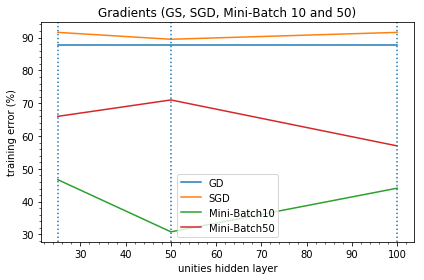

In [46]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, Mini-Batch 10 and 50)")
plt.legend()
plt.tight_layout()
plt.savefig('comparison-gradients.png', bbox_inches='tight', dpi = 100)
plt.show()

# Testes Complementares

#### Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:

## <span style="color:blue"> Setar para somente uma única época comparando com learning rate </span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 7s 2ms/step - loss: 1.9467 - acc: 0.3140 - val_loss: 0.9606 - val_acc: 0.6530
34.7
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 1ms/step - loss: 14.4009 - acc: 0.1033 - val_loss: 14.3129 - val_acc: 0.1120
88.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 14.4251 - acc: 0.1023 - val_loss: 14.4902 - val_acc: 0.1010
89.9


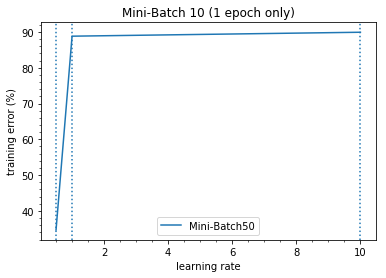

In [34]:
lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando o learning rate): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## <span style="color:blue">Setar para somente uma única época comparando com as unidades da camada oculta</span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 1.9151 - acc: 0.2813 - val_loss: 1.0005 - val_acc: 0.6150
38.5
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 3.3371 - acc: 0.1188 - val_loss: 1.8361 - val_acc: 0.2910
70.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 5s 1ms/step - loss: 2.1067 - acc: 0.2098 - val_loss: 1.4409 - val_acc: 0.4290
57.1


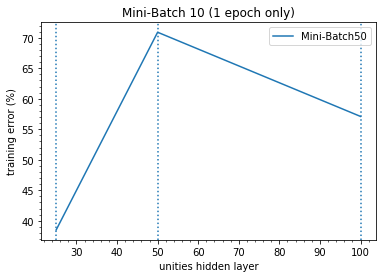

In [35]:
lr = [1, 1, 1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando as unidades da camada oculta): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Setar o learning rate para 0.2

In [ ]:
lr = [0.2, 0.2, 0.2]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (low learning rate)")
plt.legend()
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 2.0858 - acc: 0.2375 - val_loss: 1.5053 - val_acc: 0.4970
Epoch 2/10
4000/4000 [==============================] - 4s 892us/step - loss: 1.0927 - acc: 0.6410 - val_loss: 0.7579 - val_acc: 0.7490
Epoch 3/10
4000/4000 [==============================] - 3s 843us/step - loss: 0.6778 - acc: 0.7832 - val_loss: 0.6290 - val_acc: 0.7870
Epoch 4/10
4000/4000 [==============================] - 3s 845us/step - loss: 0.5107 - acc: 0.8390 - val_loss: 0.5379 - val_acc: 0.8230
Epoch 5/10
4000/4000 [==============================] - 3s 847us/step - loss: 0.4299 - acc: 0.8667 - val_loss: 0.4526 - val_acc: 0.8550
Epoch 6/10
4000/4000 [==============================] - 3s 849us/step - loss: 0.3781 - acc: 0.8842 - val_loss: 0.4139 - val_acc: 0.8760
Epoch 7/10
4000/4000 [==============================] - 4s 878us/step - loss: 0.3336 - acc: 0.8960 - val_loss: 0.4627 - val_acc: 0.8510
Ep

### Discussão sobre diminuir o learning rate: Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 